In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gc
gc.collect()

31

In [3]:
data = pd.read_csv(r'./input/lending-club-loan-data/loan_encoded.csv', low_memory=False)
data = data.drop(['Unnamed: 0'],axis=1)

In [4]:
data['Loan_Category_Bad'].value_counts()

0    1961647
1     299021
Name: Loan_Category_Bad, dtype: int64

In [22]:
data['Loan_Category_Healthy'].value_counts()
data = data.drop(['Loan_Category_Healthy'],axis=1)

In [5]:
#data1 = data.fillna(0)
#data1 = np.nan_to_num(data1)
#data = pd.DataFrame(data1, columns=data.columns)

In [23]:
data_good_loans = data.loc[data['Loan_Category_Bad']==0]
data_bad_loans = data.loc[data['Loan_Category_Bad']==1]

data_good_loans = data_good_loans.iloc[0:290000]
data_final = pd.concat([data_good_loans, data_bad_loans])

In [7]:
#start = 0
#end = 50000

# split files into 10 parts with each file having around 200k records
#for i in range(2):
#    data[start:end].to_csv(str('loan_encoded')+str(i)+str('.csv'))
#    start = end + 1
#    end = end + 200000

In [8]:
#data_final = data_final.drop(['tot_coll_amt'],axis=1)
#data_final = data_final.drop(['all_util','bc_util','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl'],axis=1)
#data_final = data_final.drop(['pct_tl_nvr_dlq','percent_bc_gt_75'],axis=1)
#data_final = data_final.drop(['pct_tl_nvr_dlq','percent_bc_gt_75'],axis=1)
#data_final = np.where(data_final.values >= np.finfo(np.float64).max)

In [9]:
#type(data_final)

In [24]:
y = data_final['Loan_Category_Bad']
X = data_final.drop(['Loan_Category_Bad'],axis=1)


In [36]:
print (y.value_counts())

1    299021
0    290000
Name: Loan_Category_Bad, dtype: int64


# Split data in test & train

In [25]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X,y)

# Baseline Model - Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', solver='lbfgs')
lr.fit(trainX, trainY)
predictedY = lr.predict(testX)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Evaluate Training Performance

#### Accuracy, Precision, Recall, F1-Score and Confusion Matrix

#### Plot ROC (= FPR vs TPR) Graph

    - ROC graph is a plot of different values of FPR & TPR for different values of Threshold on which model is evaluated
    - For e.g. if Threshold is set to .5 for classification we would get one set of values for FPR and TPR
    - if Threshold is set to 0.6 we would get another set of values for FPR and TPR
    - So, all of these values of FPR and TPR when plotted give an ROC curve
    - What we are looking for are those values of FPR & TPR which are as close to the top left corner of the graph - Why ? Because at top left corner our TPR would be maximum and FPR would be minimum. Which means that the model is giving least False Positives and maximum number of True Postives

In [39]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


print (confusion_matrix(testY, predictedY))
print ('Accuracy of LogisticRegression model is ',accuracy_score(testY, predictedY))
print ('Recall of LogisticRegression model is ',recall_score(testY, predictedY))
print ('F1-score of LogisticRegression model is ',f1_score(testY, predictedY))

[[71849   686]
 [ 2866 71855]]
Accuracy of LogisticRegression model is  0.9758787417830174
Recall of LogisticRegression model is  0.9616439822807511
F1-score of LogisticRegression model is  0.9758797245725307


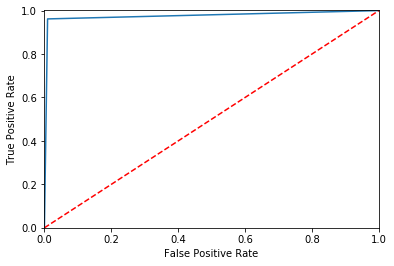

In [42]:
from sklearn.metrics import roc_curve


def show_roc_curve(falsePositiveRate, truePositiveRate):
    plt.plot(falsePositiveRate, truePositiveRate)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001,1])
    plt.ylim([0,1.001])
    plt.show()
    
fpr, tpr, threshold = roc_curve(testY, predictedY)
show_roc_curve(fpr, tpr)

In [29]:
import pickle

# save model to file
pickle.dump(lr, open("lendingclub.pickle.dat", "wb"))

# Neural Model - Logistic Regression

In [30]:
#Convert X,y dataframes to np.array

X_list = X.values
y_list = np.array(y)

In [31]:
trainX_nn, testX_nn, trainY_nn, testY_nn = train_test_split(X_list,y_list)

In [35]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#model.add(Dense(1000, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit (trainX_nn,trainY_nn, epochs=20, batch_size=128, validation_split=0.3)
model.summary()

Train on 309235 samples, validate on 132530 samples
Epoch 1/20
309235/309235 [==============================] - 29s 95us/step - loss: 8.1785 - acc: 0.4926 - val_loss: 8.1718 - val_acc: 0.4930
Epoch 2/20
309235/309235 [==============================] - 29s 93us/step - loss: 8.1785 - acc: 0.4926 - val_loss: 8.1718 - val_acc: 0.4930
Epoch 3/20
309235/309235 [==============================] - 29s 93us/step - loss: 8.1785 - acc: 0.4926 - val_loss: 8.1718 - val_acc: 0.4930
Epoch 4/20
309235/309235 [==============================] - 30s 98us/step - loss: 8.1785 - acc: 0.4926 - val_loss: 8.1718 - val_acc: 0.4930
Epoch 5/20
309235/309235 [==============================] - 29s 93us/step - loss: 8.1785 - acc: 0.4926 - val_loss: 8.1718 - val_acc: 0.4930
Epoch 6/20
309235/309235 [==============================] - 29s 93us/step - loss: 8.1785 - acc: 0.4926 - val_loss: 8.1718 - val_acc: 0.4930
Epoch 7/20
309235/309235 [==============================] - 29s 94us/step - loss: 8.1785 - acc: 0.4926 - val

KeyboardInterrupt: 

In [19]:
predictedY_nn = model.predict(testX_nn)

print ('Confusion Matrix of NN model is 'confusion_matrix(testY_nn, predictedY_nn))
print ('Accuracy of NN model is 'accuracy_score(testY_nn, predictedY_nn))
print ('Recall of NN model is 'recall_score(testY_nn, predictedY_nn))
print ('F1-score of NN model is 'f1_score(testY_nn, predictedY_nn))

SyntaxError: invalid syntax (<ipython-input-19-853102ee12a5>, line 3)